# **Settings**

In [ ]:
# 패키지 설치
!pip install langchain_google_genai faiss-cpu langchain_community langchain_openai sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.3/335.3 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 

In [ ]:
# 라이브러리 불러오기
import os
import sys
from langchain_community.document_loaders.csv_loader import CSVLoader
from pathlib import Path
from langchain_openai import ChatOpenAI,OpenAIEmbeddings
import os
from dotenv import load_dotenv
load_dotenv()
from langchain.document_loaders import CSVLoader
from langchain.text_splitter import TextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.prompts import PromptTemplate
import faiss

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive/')

# 경로 지정
import os
os.chdir('/content/drive/MyDrive/RAG_LLM')

Mounted at /content/drive/


## **임베딩과 벡터 불러오기**

In [ ]:
# 임베당과 벡터스토어 불러오기
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
new_vectorstore = FAISS.load_local("vectorstore_index_contextual_nonoverlapping", embeddings, allow_dangerous_deserialization=True)
new_vectorstore

<ipython-input-10-6d0fd02c2ce5>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` do

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **데이터 불러오기**

In [ ]:
# 그래프임베딩이 포함된 데이테프레임 불러오기
import pandas as pd
import numpy as np

data = pd.read_csv("user_graph_embeddings.csv")
data['graph_embedding'] = np.array(data['graph_embedding'].apply(eval))

## **그래프 임베딩 사용**

In [ ]:
import numpy as np

# 그래프 임베딩을 헤더로 사용
def create_header_embeddings_dict(data):
    header_embeddings_dict = {}

    for _, row in data.iterrows():
        user_id = str(row["UserId"])
        graph_embedding = np.array(row["graph_embedding"])

        # UserId를 키로 저장
        header_embeddings_dict[user_id] = graph_embedding

    return header_embeddings_dict

# UserId별 그래프 임베딩 벡터 매핑 생성
header_embeddings_dict = create_header_embeddings_dict(data)

In [ ]:
import numpy as np
import faiss
import pandas as pd
from tqdm import tqdm

# UserId와 그래프 임베딩 리스트로 변환
user_ids = list(header_embeddings_dict.keys())
graph_embeddings = np.array(list(header_embeddings_dict.values())).astype(np.float32)

# FAISS 인덱스 생성
dimension = graph_embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dimension)

# 벡터DB에 그래프 임베딩 추가
faiss_index.add(graph_embeddings)
user_ids = data["UserId"].tolist()

# **RAPTOR 트리 구축**

## **차원축소**

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
import umap

# 임베딩 추출
def extract_embeddings(graph_vectorstore):
    num_vectors = graph_vectorstore.ntotal  # 벡터 개수
    dimension = graph_vectorstore.d  # 벡터 차원
    embeddings = np.zeros((num_vectors, dimension), dtype=np.float32)

    # FAISS 벡터 추출
    for i in range(num_vectors):
        embeddings[i] = graph_vectorstore.reconstruct(i)

    return embeddings

# umap을 사용한 차원 축소
def apply_umap(embeddings, target_dim=10, n_neighbors=30, min_dist=0.1):
    """400차원 벡터를 UMAP으로 10차원으로 차원 축소"""
    print(f"⚙️ UMAP 실행 중... (입력 차원: {embeddings.shape[1]}, 목표 차원: {target_dim})")

    reducer = umap.UMAP(
        n_components=target_dim,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=42
    )

    embeddings_reduced = reducer.fit_transform(embeddings)

    return embeddings_reduced

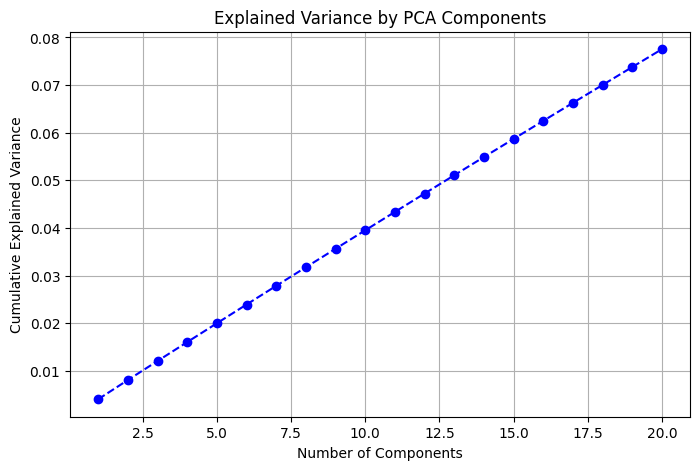

💡 10차원에서 보존되는 누적 분산 비율: 0.0775


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 활용한 분산 설명률 계산 (20차원까지)
pca = PCA(n_components=20)
pca.fit(graph_embeddings)

# 분산 설명률 출력
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), cumulative_variance, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

## **GMM 클러스터링**

## **RAPTOR 트리 생성**

In [ ]:
import numpy as np
import pandas as pd
import logging
from tqdm import tqdm
from sklearn.mixture import GaussianMixture

# 클러스터 매핑 딕셔너리
cluster_mapping = {}

# GMM 클러스터링
def perform_clustering(embeddings: np.ndarray, n_clusters: int = 10) -> np.ndarray:
    gm = GaussianMixture(n_components=n_clusters, random_state=42)
    return gm.fit_predict(embeddings)

# 그래프 임베딩을 이용해 RAPTOR TREE 만들기
def build_raptor_tree(graph_embeddings: np.ndarray, user_ids: list, max_levels: int = 3, n_clusters: int = 20):

    results = {}  # 각 층별로 결과 저장
    current_vectors = graph_embeddings.copy()
    current_user_ids = user_ids.copy()  # 초기 사용자 ID
    current_metadata = [{"level": 0, "origin": "original", "parent_id": None} for _ in range(len(user_ids))]

    for level in range(1, max_levels + 1):

        # 클러스터 개수 설정
        n_clusters = min(n_clusters, len(current_vectors) // 4)

        # GMM 기반 클러스터링 수행
        cluster_labels = perform_clustering(current_vectors, n_clusters)

        # 현재 층에서의 데이터 저장
        df = pd.DataFrame({
            'user_id': current_user_ids,
            'embedding': list(current_vectors),
            'cluster': cluster_labels,
            'metadata': current_metadata
        })
        results[level - 1] = df

        new_vectors = []
        new_user_ids = []
        new_metadata = []

        # 클러스터별 그룹화
        for cluster in tqdm(df['cluster'].unique(), desc=f"🔍 Level {level} - Clustering"):
            cluster_docs = df[df['cluster'] == cluster]
            cluster_vectors = np.array(cluster_docs['embedding'].tolist())
            cluster_metadata = cluster_docs['metadata'].tolist()

            # 클러스터 중심 벡터 계산 (평균으로 계산)
            cluster_center = np.mean(cluster_vectors, axis=0)
            new_vectors.append(cluster_center)

            # 새로운 상위 노드 ID (요약)
            cluster_id = f"cluster_{level}_{cluster}"
            new_user_ids.append(cluster_id)

            # 하위 노드 수집
            child_ids cluster_docs['user_id'].tolist()

            # 클러스터 매핑 저장
            cluster_mapping[cluster_id] = child_ids

            # 새로운 메타데이터 추가
            new_metadata.append({
                "level": level,
                "origin": f"summary_of_cluster_{cluster}_level_{level - 1}",
                "child_ids": child_ids,
                "id": cluster_id
            })

        # 다음 레벨 데이터 업데이트
        current_vectors = np.array(new_vectors)
        current_user_ids = new_user_ids
        current_metadata = new_metadata

        # 클러스터링할 데이터가 1개 이하일 경우 종료
        if len(current_vectors) <= 1:
            results[level] = pd.DataFrame({
                'user_id': current_user_ids,
                'embedding': list(current_vectors),
                'cluster': [0],
                'metadata': current_metadata
            })
            break

    return results, cluster_mapping


In [ ]:
# 사용자ID
user_ids = data["UserId"].tolist()

# RAPTOR 트리 구축 / 클러스터 정보
raptor_tree, cluster_mapping = build_raptor_tree(graph_embeddings, user_ids, max_levels=5, n_clusters=1024)

# 결과 확인
print("RAPTOR Tree Level 0:")
print(raptor_tree[0].head())

🔍 Level 5 - Clustering: 100%|██████████| 4/4 [00:00<00:00, 769.39it/s]

📌 RAPTOR Tree Level 0:
   user_id                                          embedding  cluster  \
0        1  [0.012127683, 0.010300171, 0.017142007, 0.0006...      873   
1        2  [-0.0037087128, 0.016209401, 0.014633145, 0.01...      591   
2        3  [0.012741502, 0.0071289428, -0.01548145, -0.00...      394   
3        4  [-0.0010510394, -0.005554354, 0.009953368, -0....      908   
4        5  [-0.010158206, -0.010009971, 0.009422761, 0.01...      352   

                                            metadata  
0  {'level': 0, 'origin': 'original', 'parent_id'...  
1  {'level': 0, 'origin': 'original', 'parent_id'...  
2  {'level': 0, 'origin': 'original', 'parent_id'...  
3  {'level': 0, 'origin': 'original', 'parent_id'...  
4  {'level': 0, 'origin': 'original', 'parent_id'...  

📌 클러스터 매핑 예시:
cluster_1_873: [1, 109, 302, 349, 627, 651, 684, 760, 960, 1094, 1124, 1254, 1443, 1591, 1637, 1680, 1843, 1910, 2124, 2248, 2250, 2324, 2870, 2884, 3270, 3527, 3631, 3636, 3729, 3835, 38

## **저장**

In [ ]:
import json

# 클러스터 매핑을 JSON 파일로 변환
def save_cluster_mapping(cluster_mapping, filename="cluster_mapping.json"):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(cluster_mapping, f, indent=4, ensure_ascii=False)

# 클러스터 매핑 저장
save_cluster_mapping(cluster_mapping)

✅ 클러스터 매핑 저장 완료: cluster_mapping.json


In [ ]:
import pickle

# RAPTOR 트리 저장
with open("graph_raptor_tree.pkl", "wb") as f:
    pickle.dump(raptor_tree, f)
print("RAPTOR 트리 저장 완료: raptor_tree.pkl")

✅ RAPTOR 트리 저장 완료: raptor_tree.pkl


In [ ]:
# RAPTOR 벡터DB 저장
def build_vectorstore_from_tree(tree: dict) -> faiss.IndexFlatL2:
    all_embeddings = []
    for level, df in tree.items():
        all_embeddings.extend(df['embedding'].tolist())
    all_embeddings = np.stack(all_embeddings, axis=0).astype('float32')
    dimension = all_embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(all_embeddings)
    return index

faiss_vectorstore_1 = build_vectorstore_from_tree(raptor_tree)
faiss.write_index(faiss_vectorstore, "raptor_graph_embeddings_faiss_db.index")